Import Libraries and read data

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


EDA

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [325]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [326]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='survived', ylabel='count'>

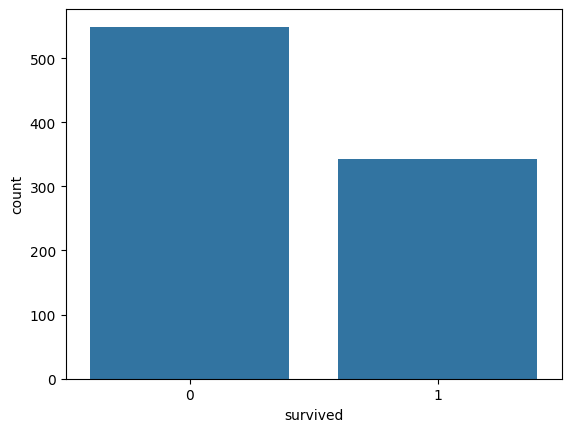

In [327]:
sns.countplot(x='survived',data=df)

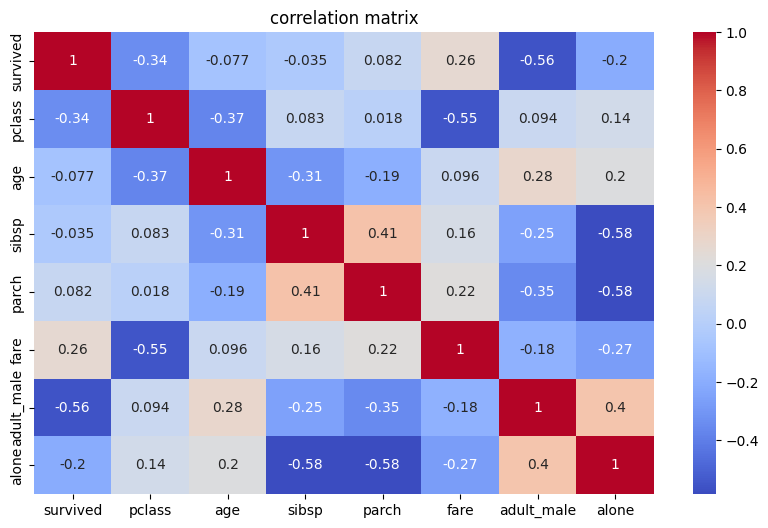

In [328]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

<Axes: >

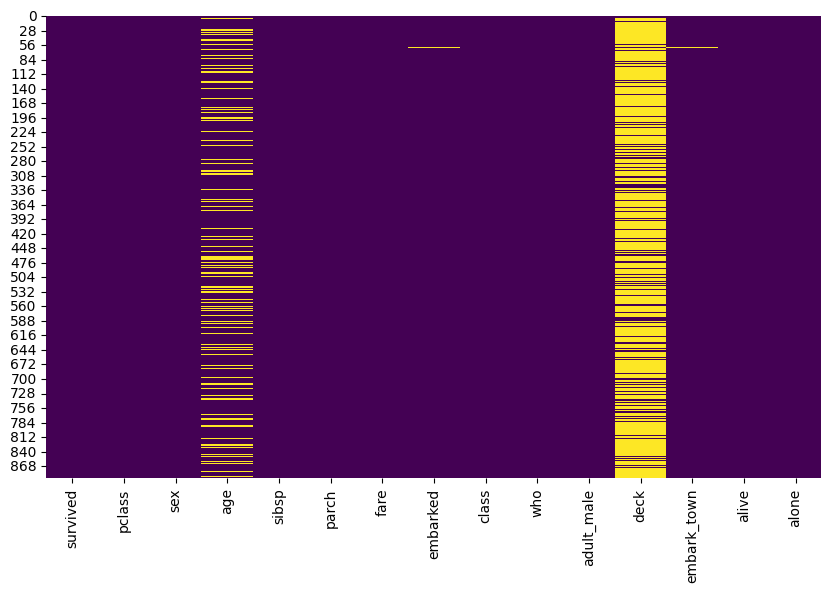

In [329]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<Axes: >

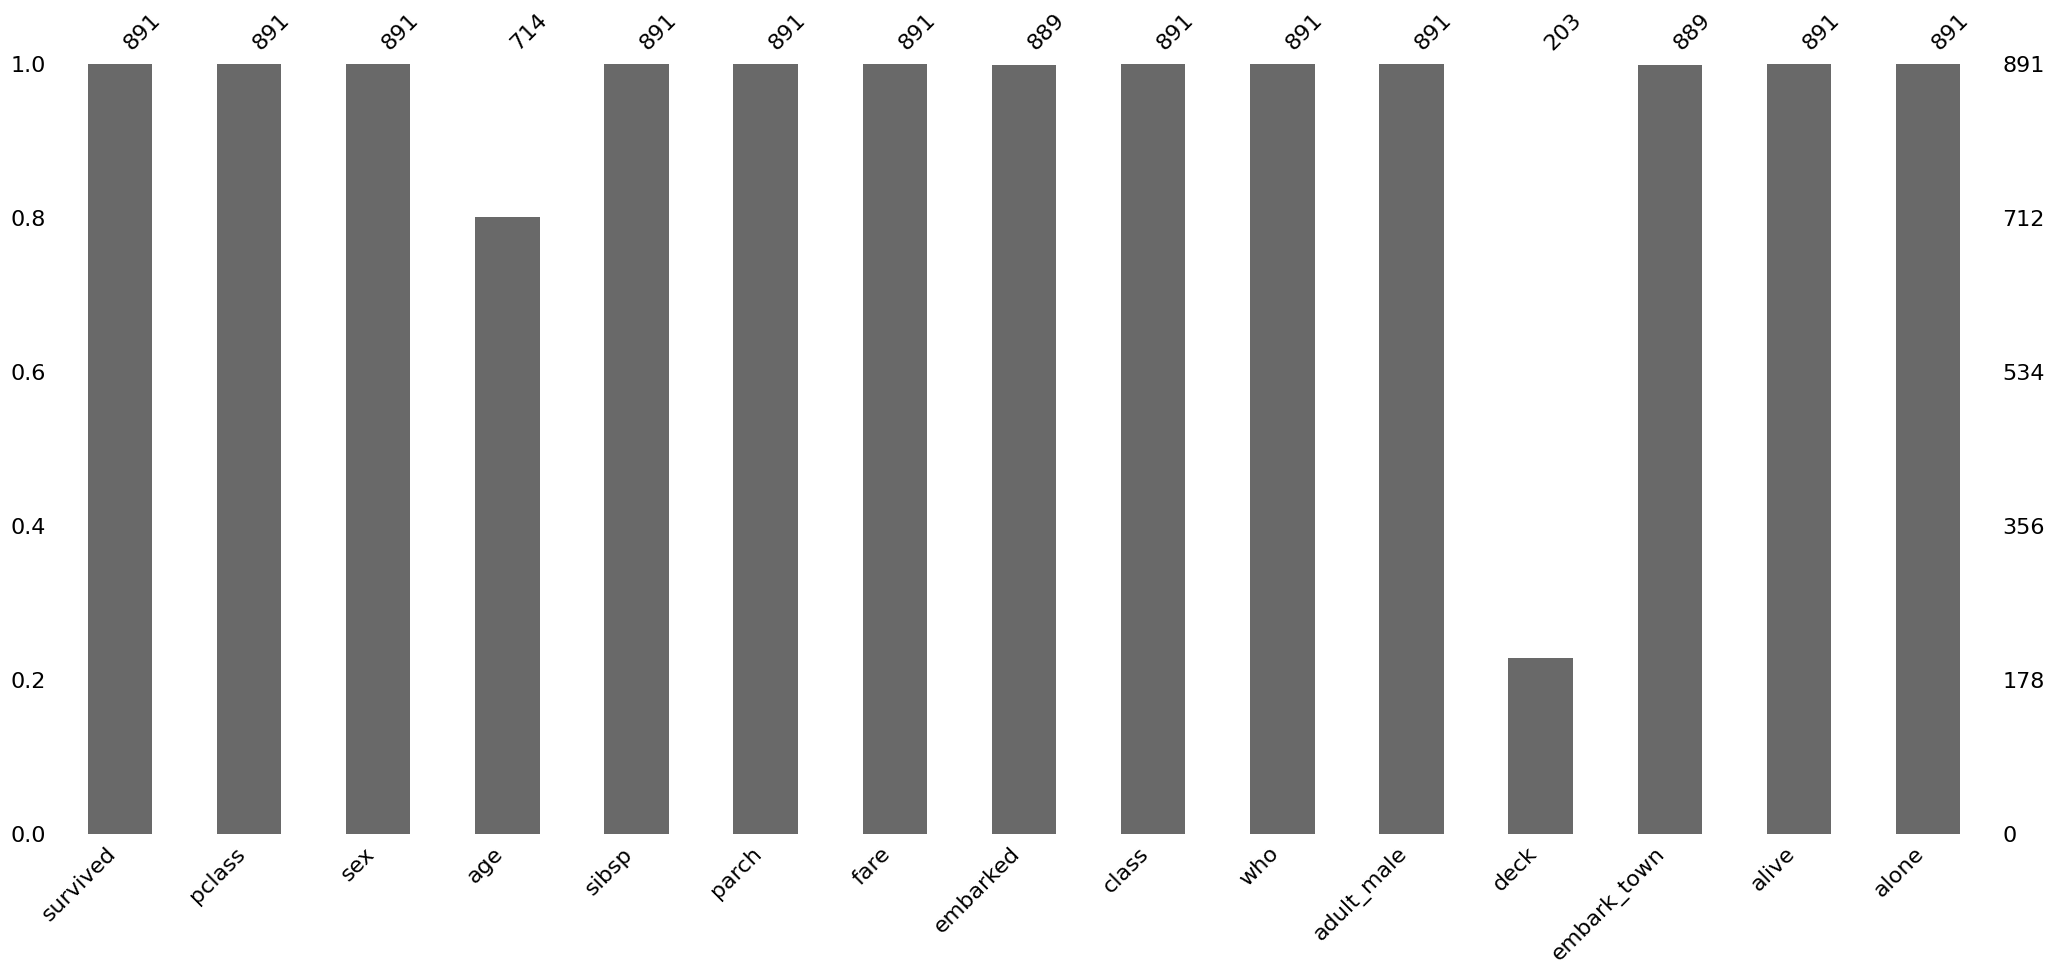

In [330]:
import missingno as msno
msno.bar(df)

<Axes: xlabel='survived', ylabel='fare'>

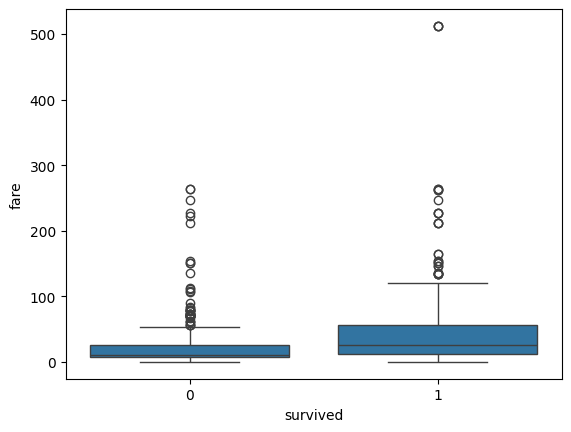

In [331]:
sns.boxplot(x='survived',y='fare',data=df)


<Axes: xlabel='survived', ylabel='age'>

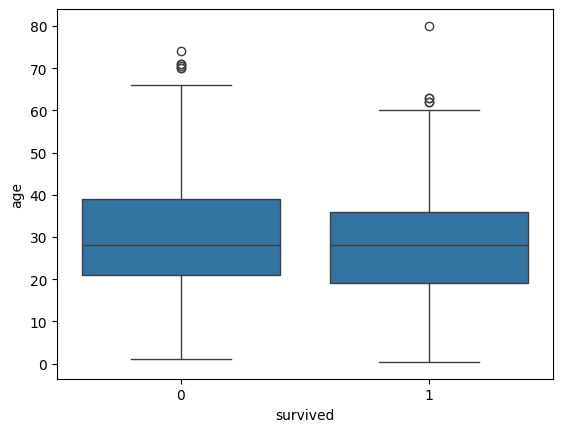

In [332]:
sns.boxplot(x='survived',y='age',data=df)


In [333]:
print(df.groupby('sex')['survived'].mean())
print(df.groupby('pclass')['survived'].mean())
print(df.groupby('adult_male')['survived'].mean())
print(df.groupby('alone')['survived'].mean())
print(df.groupby('embarked')['survived'].mean())


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64
adult_male
False    0.717514
True     0.163873
Name: survived, dtype: float64
alone
False    0.505650
True     0.303538
Name: survived, dtype: float64
embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


Data Cleaning (drop nan and compenstaion form them & drop outliers)

In [334]:
df.shape


(891, 15)

In [335]:
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [336]:
df.shape

(891, 15)

In [337]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [338]:
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2152\2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [339]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='deck', ylabel='fare'>

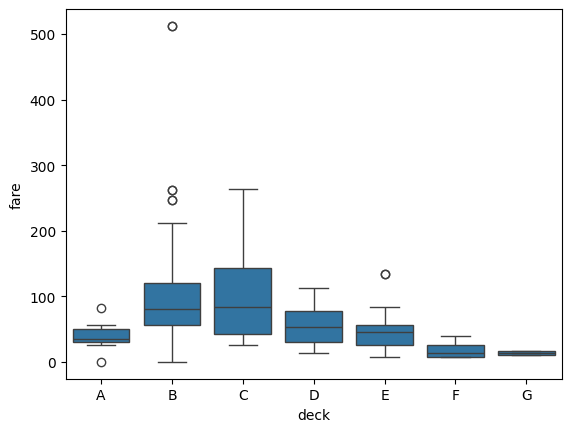

In [340]:
sns.boxplot(x='deck', y='fare', data=df)

In [341]:
df['deck']=df['deck'].cat.add_categories('Unknown')
df['deck']=df['deck'].fillna('Unknown')

In [342]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,Unknown,Queenstown,no,True
182,0,3,male,9.0,4,2,31.3875,S,Third,child,False,Unknown,Southampton,no,False


In [343]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2152\2598109624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2152\2598109624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [344]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [345]:
def remove_outliers_iqr(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]

df= remove_outliers_iqr(df,'fare')
df= remove_outliers_iqr(df,'age')


In [346]:
df[['fare','age']].describe()

,fare,age
count,708.000000,708.00000
mean,17.135092,28.05226
std,13.414455,9.50620
min,0.000000,4.00000
25%,7.879200,22.00000
50%,11.241700,28.00000
75%,25.496900,32.00000
max,65.000000,52.00000


In [347]:
df.drop(['embark_town', 'alive'], axis=1, inplace=True)


Feature Engineering

In [348]:
#df= pd.get_dummies(df,columns=['sex','embarked','class','who','deck'],drop_first=True)


In [349]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Unknown,True


In [350]:
df.to_csv('titanic_cleaned.csv', index=False)
